C:\Users\VivoBook\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VivoBook\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1-score: 0.8789115646258504, Precision: 0.9238095238095236, Recall: 0.8571428571428571
The additional image is predicted as: 17.0
The additional image is predicted as: 27.0
Success rate: 85.71%


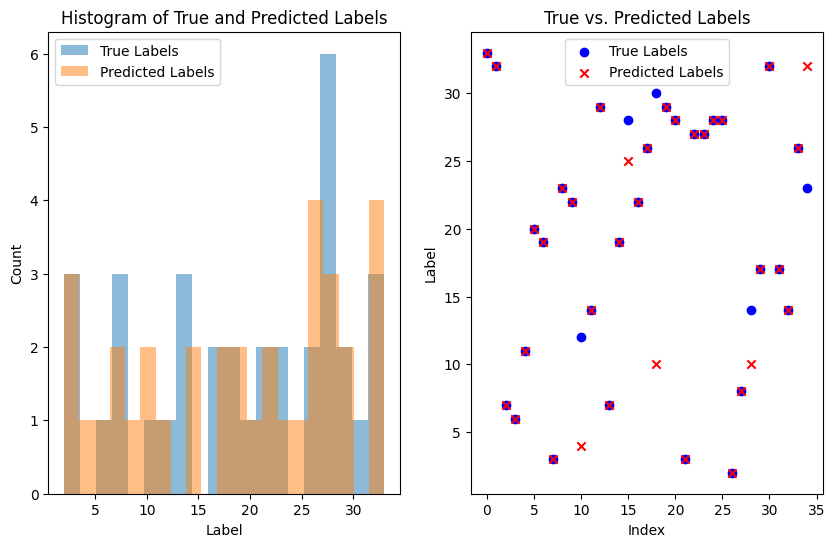

In [9]:
import numpy as np
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

dataset = np.zeros((350, 112, 92))
labels = np.zeros((350,))

def show_image(filepath):
    im = Image.open(filepath)
    return np.array(im)

for i in range(4):
    for j in range(10):
        data = show_image(f'Faces/s{i+1}/{j+1}.pgm')
        labels[i*10+j] = i+1
        dataset[i*10+j, :, :] = data

for i in range(5, 35):
    for j in range(10):
        data = show_image(f'Faces/s{i+5}/{j+1}.pgm')
        labels[i*10+j] = i
        dataset[i*10+j, :, :] = data

x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.10)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Define a function to extract features from images
def extract_features(images):
    features = np.array([np.array(image).flatten() for image in images])
    return features

# Extract features from training and test data
X_train_features = extract_features(x_train)
X_test_features = extract_features(x_test)

# Train the classifier
knn.fit(X_train_features, y_train)

# Predict on test data
y_pred = knn.predict(X_test_features)

# Evaluate performance
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1}, Precision: {precision}, Recall: {recall}")

# 8. Get additional images outside the dataset
additional_images = [
    Image.open('additional_image1.jpg'),
    Image.open('additional_image2.jpg'),
]

# 9. Check if the additional images are recognized or not
for image in additional_images:
    resized_image = image.resize((92, 112))
    gray_image = resized_image.convert('L')
    features = np.array(gray_image).flatten().reshape(1, -1)
    prediction = knn.predict(features)
    print(f"The additional image is predicted as: {prediction[0]}")


# 10. Evaluate your final algorithm (histograms, success rates, etc.)
correct = np.sum(y_pred == y_test)
total = len(y_test)
success_rate = correct / total * 100
print(f"Success rate: {success_rate:.2f}%")

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(y_test, bins=len(np.unique(y_test)), alpha=0.5, label='True Labels')
plt.hist(y_pred, bins=len(np.unique(y_pred)), alpha=0.5, label='Predicted Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of True and Predicted Labels')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='True Labels', color='b', marker='o')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Labels', color='r', marker='x')
plt.xlabel('Index')
plt.ylabel('Label')
plt.title('True vs. Predicted Labels')
plt.legend()
plt.show()

The visualizations provided insights into the KNN model's performance on the face recognition task. While the histogram showed some similarities between the true and predicted label distributions, there were noticeable discrepancies, indicating misclassifications. The scatter plot further highlighted these misclassifications, with many points deviating from the diagonal line where true and predicted labels should match.

The results suggest that the KNN model is capturing the general label distribution reasonably well but struggles with accurate predictions for certain individuals or label values. The visualizations revealed that the deviations were more pronounced for specific label values, suggesting that the model faces challenges in correctly classifying certain individuals.